In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# --- Part 1: Displaying the .graphml file ---
def plot_graphml(filename):
    try:
        # NetworkX has a built-in reader for GraphML
        G = nx.read_graphml(filename)
        
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G, k=0.15, iterations=20)
        nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", 
                font_size=8, edge_color="gray", arrows=True)
        plt.title(f"Visualization of {filename}")
        plt.show()
        print(f"Successfully plotted {filename} with {G.number_of_nodes()} nodes.")
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# --- Part 2: Displaying the .json file ---
def plot_custom_json(filename):
    try:
        with open(filename, 'r') as f:
            data = json.load(f)
        
        G = nx.DiGraph() # Assuming directed based on the data structure
        
        # Add edges from the custom JSON structure [source, target, attributes]
        # The JSON uses a list of lists: ["source", "target", {"weight": 0.8}] 
        if "edges" in data:
            for edge in data["edges"]:
                u, v, attr = edge
                G.add_edge(u, v, **attr)
        
        plt.figure(figsize=(10, 6))
        # Shell layout might work better for this smaller dataset
        pos = nx.shell_layout(G)
        
        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen", 
                font_size=9, font_weight="bold", arrows=True)
        
        # Draw edge labels (weights)
        edge_labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        
        plt.title(f"Visualization of {filename}")
        plt.show()
        print(f"Successfully plotted {filename} with {G.number_of_nodes()} nodes.")
        
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Run the functions


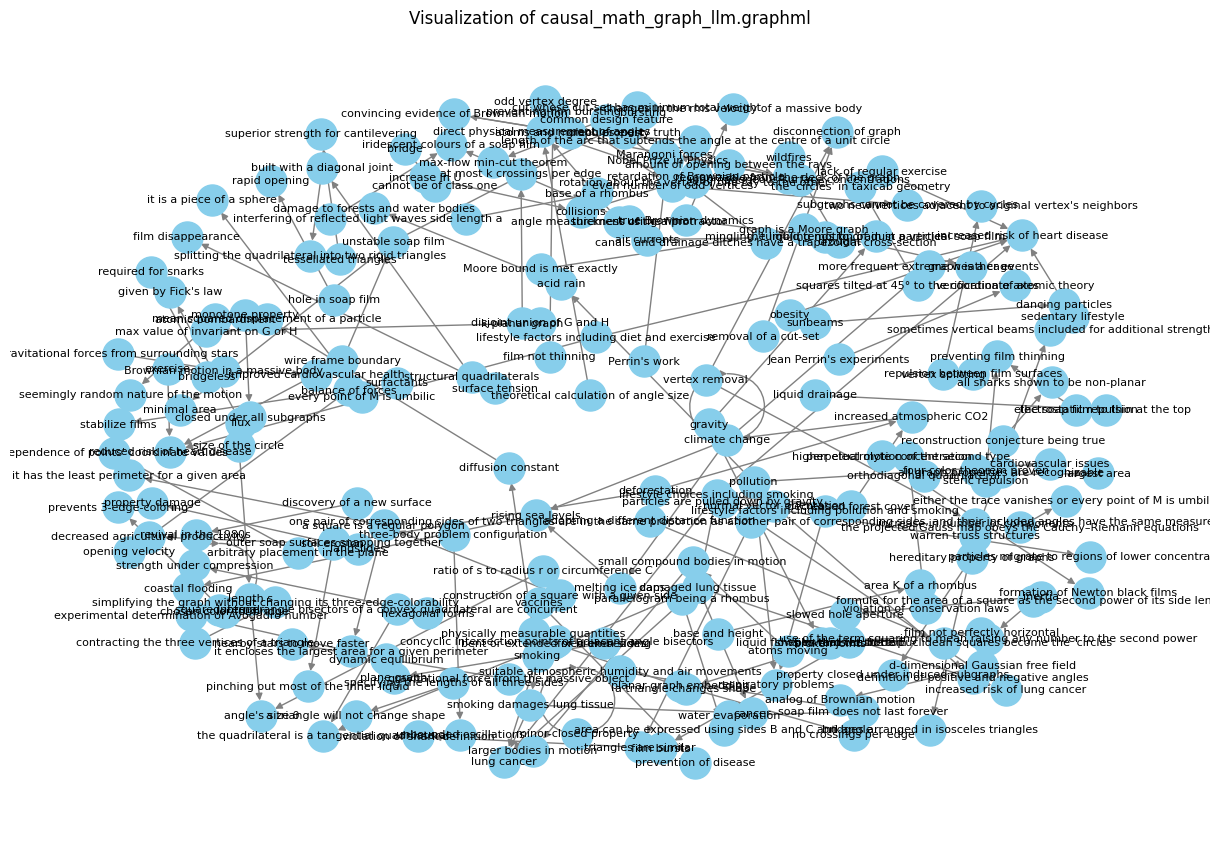

Successfully plotted causal_math_graph_llm.graphml with 219 nodes.


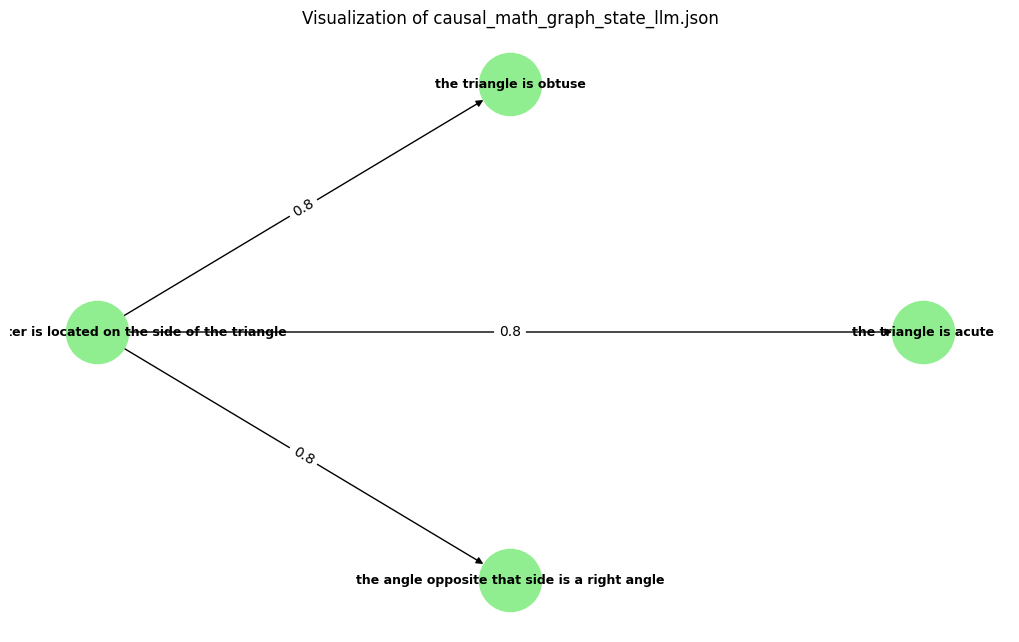

Successfully plotted causal_math_graph_state_llm.json with 4 nodes.


In [3]:
plot_graphml('causal_math_graph_llm.graphml')
plot_custom_json('causal_math_graph_state_llm.json')